# Preprocessing
written by Tianpei Xie, Mar 14, 2016

## Load data 
from ./train  and ./test

In [1]:
%reset 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Read the accident, person and vehicle data file

In [4]:
# read the accident file
acc_trn_df = pd.read_csv("./train/accident_train.csv")
# read the person file
per_trn_df = pd.read_csv("./train/person_train.csv")
# read the vehicle file
veh_trn_df = pd.read_csv("./train/vehicle_train.csv")

#acc_trn_df.fillna(0, inplace=True)
#per_trn_df.fillna(0, inplace=True)
#veh_trn_df.fillna(0, inplace=True)

acc_tst_df  = pd.read_csv("./test/accident_test.csv")
per_tst_df = pd.read_csv("./test/person_test.csv")
veh_tst_df = pd.read_csv("./test/vehicle_test.csv")
#fillna
#acc_tst_df.fillna(0, inplace=True)
#per_tst_df.fillna(0, inplace=True)
#veh_tst_df.fillna(0, inplace=True)

Ydata = acc_trn_df['DRUNK_DR'].values
Ydata_df = acc_trn_df['DRUNK_DR']

/home/tianpei/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
acc_trn_df.columns

In [6]:
Ydata_df

0         False
1          True
2          True
3         False
4         False
5         False
6          True
7         False
8         False
9         False
10         True
11         True
12        False
13        False
14        False
15         True
16         True
17         True
18         True
19         True
20        False
21         True
22         True
23         True
24        False
25         True
26        False
27        False
28         True
29        False
          ...  
287556    False
287557    False
287558    False
287559     True
287560    False
287561    False
287562    False
287563    False
287564    False
287565    False
287566    False
287567     True
287568     True
287569    False
287570    False
287571     True
287572    False
287573    False
287574     True
287575    False
287576    False
287577    False
287578     True
287579     True
287580    False
287581    False
287582    False
287583    False
287584    False
287585    False
Name: DRUNK_DR, dtype: b

## Data filtering and feature hashing
fillna, transfer categorical to numerical data, and count most frequent component

### Drop irrelevant features 

In [7]:
acc_columns = acc_trn_df.columns.tolist()
per_columns = per_trn_df.columns.tolist()
veh_columns = veh_trn_df.columns.tolist()
acc_drop_list = ['DRUNK_DR','YEAR', 'DAY', 'MONTH','CITY','TWAY_ID', 'RAIL','NOT_HOUR',\
                 'NOT_MIN','ARR_HOUR','ARR_MIN','HOSP_HR','HOSP_MN']
acc_trn_df.drop(acc_drop_list, axis = 1, inplace=True)
acc_trn_df.columns

Index(['ID', 'STATE', 'VE_FORMS', 'PEDS', 'PERSONS', 'COUNTY', 'DAY_WEEK',
       'HOUR', 'MINUTE', 'NHS', 'ROAD_FNC', 'ROUTE', 'MILEPT', 'LATITUDE',
       'LONGITUD', 'SP_JUR', 'HARM_EV', 'MAN_COLL', 'REL_ROAD', 'LGT_COND',
       'WEATHER', 'SCH_BUS', 'CF1', 'CF2', 'CF3', 'FATALS'],
      dtype='object')

### Feature quantization for DAY_WEEK, HOUR and MINUTE
cut DAY_WEEK to be 0 (Weekdays) or 1 (Weekends)

In [8]:
acc_trn_df['COUNTY'] = acc_trn_df['COUNTY'].apply(lambda x: x if( x < 990) else np.nan)
acc_trn_df['DAY_WEEK'] = acc_trn_df['DAY_WEEK'].apply(lambda x: 1 if( x == 7 or x == 1 ) else 0)
acc_trn_df.dropna(axis = 0, inplace=True)

quantization via quantile 

In [9]:
out_hr, bins_hr = pd.qcut(x=acc_trn_df['HOUR'], q=[0, 0.1, 0.5,0.9, 1.], labels=False, retbins=True)
acc_trn_df['HOUR'] = out_hr

In [10]:
out_min, bins_min = pd.qcut(acc_trn_df['MINUTE'], [0, 0.1, 0.5,0.9, 1.], labels=False, retbins=True)
acc_trn_df['MINUTE'] = out_min

In [11]:
cat_list = ['DAY_WEEK','HOUR', 'MINUTE', 'NHS','ROAD_FNC','ROUTE','SP_JUR','HARM_EV'\
             ,'MAN_COLL','REL_ROAD','LGT_COND','WEATHER'\
             ,'SCH_BUS', 'CF1','CF2','CF3']
acc_trn_df

,ID,STATE,VE_FORMS,PEDS,PERSONS,COUNTY,DAY_WEEK,HOUR,MINUTE,NHS,...,HARM_EV,MAN_COLL,REL_ROAD,LGT_COND,WEATHER,SCH_BUS,CF1,CF2,CF3,FATALS
0,0,1,1.0,0,1,21.0,0,1,1,0,...,34,0,4,4,2,0,0,0,0,1
1,1,1,1.0,0,1,71.0,0,2,2,0,...,34,0,4,1,1,0,0,0,0,1
2,2,1,1.0,0,1,51.0,1,1,1,0,...,37,0,4,1,1,0,0,0,0,1
3,3,1,1.0,0,1,111.0,1,1,2,0,...,42,0,4,1,1,0,0,0,0,1
4,4,1,2.0,0,3,13.0,0,2,1,1,...,12,3,1,2,1,0,0,0,0,1
5,5,1,1.0,0,1,101.0,1,2,1,0,...,34,0,4,1,1,0,0,0,0,1
6,6,1,2.0,0,3,43.0,1,2,0,0,...,12,5,1,2,1,0,0,0,0,2
7,7,1,1.0,0,1,61.0,1,1,1,0,...,34,0,4,1,1,0,0,0,0,1
8,8,1,2.0,0,12,63.0,0,1,0,1,...,12,7,1,1,1,0,0,0,0,1
9,9,1,1.0,0,1,119.0,0,1,2,1,...,24,0,2,1,1,0,0,0,0,1


### Vector quantization for (STATE, COUNTY), drop CITY

In [12]:
temp_df = acc_trn_df.loc[:,['STATE','COUNTY']]

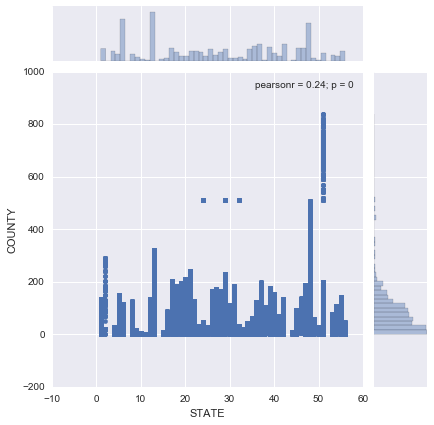

In [13]:
sns.jointplot(x='STATE', y='COUNTY',data=temp_df) #scatterplot for (STATE, COUNTY) items, see clusters 

Vector quantization for [STATE, COUNTY]

In [13]:
from sklearn.cluster import KMeans, DBSCAN
np.random.seed(12342) 
k_means = KMeans(n_clusters = 9, n_init= 8)
k_means.fit(temp_df.values)
labels = k_means.labels_
values = k_means.cluster_centers_.squeeze()
# save a series
acc_trn_state_county = pd.Series(data=labels, index=acc_trn_df['ID'], name="STATE_COUNTY")

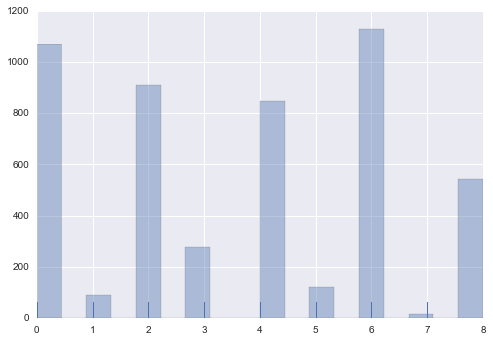

In [14]:
# see histogram of a subset of 5000 samples 
randIndex = np.random.choice(acc_trn_state_county.index.tolist(), 5000)
temp = acc_trn_state_county[randIndex]
sns.distplot(temp.values, kde=False, rug=True)  # see distribution of clusters

###  Extract (Latitude, Longitude) and make clustering

In [15]:
acc_trn_latlon_df = acc_trn_df.loc[:,['LATITUDE','LONGITUD']]
acc_trn_latlon_df['LATITUDE'] = acc_trn_latlon_df['LATITUDE'].map(lambda x: x if(x <= 90 and x>= -90) else np.nan)
acc_trn_latlon_df['LONGITUD'] = acc_trn_latlon_df['LONGITUD'].map(lambda x: x if(x <= 180 and x>= -180) else np.nan)
acc_trn_df.loc[:,['LATITUDE','LONGITUD']] = acc_trn_latlon_df 

In [16]:
# see histogram of a subset of 5000 samples 
randIndex2 = np.random.choice(acc_trn_latlon_df.dropna(axis=0).index.tolist(), 50000)
temp2 = acc_trn_latlon_df.loc[randIndex2,:]

Use basemap to plot on the earth

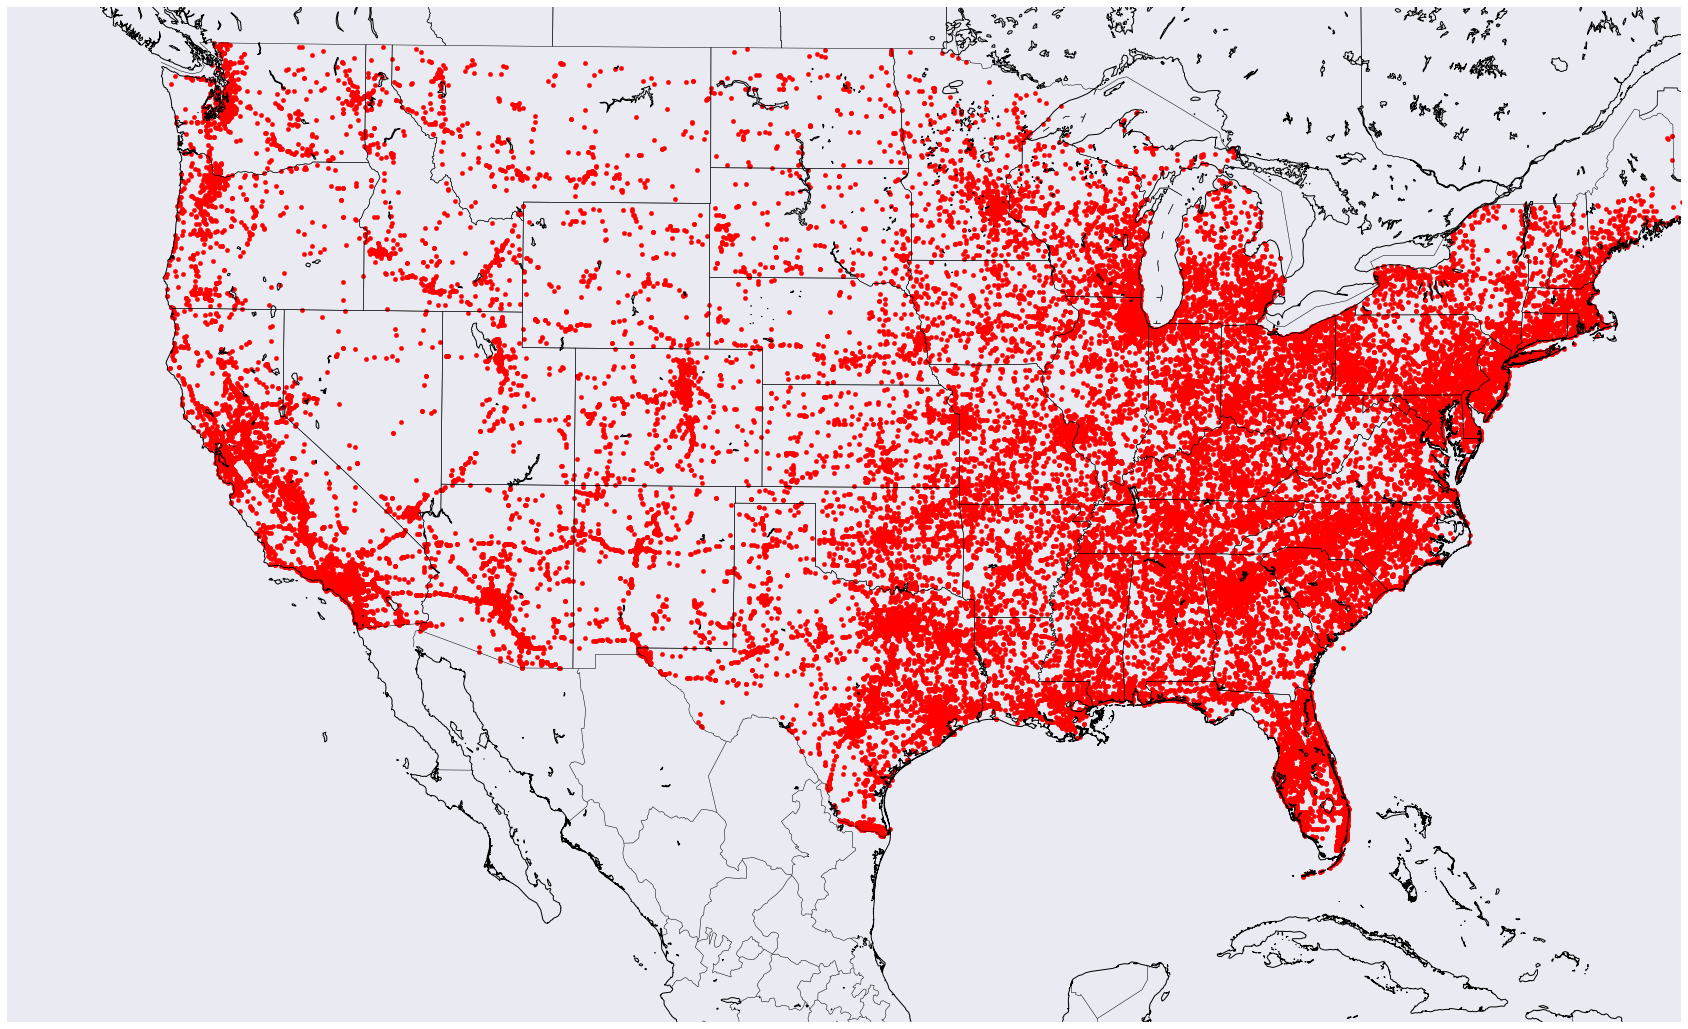

In [17]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure()
fig.set_size_inches(30,30)
m = Basemap(llcrnrlon=-130, llcrnrlat=np.min(temp2['LATITUDE']), 
            urcrnrlon=np.max(temp2['LONGITUD']), urcrnrlat=50, 
            #llcrnrlon=np.min(temp2['LONGITUD'])-20, llcrnrlat=np.min(temp2['LATITUDE'])-10, \
            #urcrnrlon=np.max(temp2['LONGITUD'])+20, urcrnrlat=np.max(temp2['LATITUDE'])+10,\
            projection='lcc', resolution='i', area_thresh=1, lat_1=-40, lat_2=42,lon_0=-85)
m.drawcoastlines()
m.drawstates()
m.drawcountries()
lons = temp2['LONGITUD'].values
lats = temp2['LATITUDE'].values
x, y = m(lons, lats)

m.scatter(x, y, s=20, marker='o', color='r')
plt.show()

Use DBSCAN - Density-Based Spatial Clustering of Applications with Noise to cluser

In [22]:
n_acc= len(acc_trn_df.index)
rho = 0.2
np.ceil(n_acc*rho).astype(np.int64)

55674

In [47]:
dbscan = DBSCAN(eps=1, min_samples = 500, algorithm='kd_tree')
rho = 0.2
randIndex2 = np.random.choice(acc_trn_latlon_df.dropna(axis=0).index.tolist(), np.ceil(n_acc*rho).astype(np.int64))
subsample_trn = acc_trn_latlon_df.loc[randIndex2,:]
dbscan.fit(X=subsample_trn.values)
labels = dbscan.labels_
dbscan_values = dbscan.components_

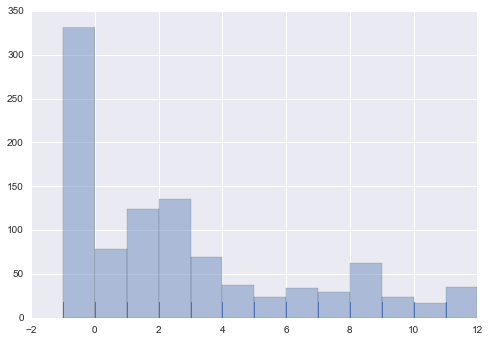

In [48]:
sns.distplot(labels[np.random.choice(len(labels), 1000)], kde=False, rug=True) 

In [49]:
acc_trn_latlon_df.loc[randIndex2[labels==0],'LONGITUD']

84615    -81.685461
124710   -80.079894
9852     -80.282403
46391    -80.414308
87192    -80.200736
198665   -80.111033
124938   -81.082208
85064    -80.102089
233652   -82.451492
46758    -81.707575
46543    -81.868267
164530   -81.273056
86126    -80.441672
232942   -80.452881
84530    -80.203206
263795   -80.092069
234236   -80.671750
164312   -80.165789
264524   -81.369969
84591    -82.500775
263044   -80.281356
46821    -82.401853
9162     -81.037261
263487   -82.775664
233845   -82.681689
8451     -82.610178
232972   -81.402678
8376     -82.618850
46240    -81.525686
46865    -80.273947
            ...    
264236   -81.751739
8834     -80.281872
263168   -81.740833
262893   -80.372200
9721     -80.430231
85870    -82.098947
124468   -81.171792
163696   -82.386003
199303   -82.539972
125909   -80.820208
8067     -82.297394
125520   -82.111208
124734   -80.349339
199774   -82.769108
199508   -82.786511
164242   -81.989181
8329     -81.010369
263065   -81.196808
163406   -81.396828


In [62]:
unique_labels = np.unique(labels)

In [63]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=-1, vmax=unique_labels[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
scalarMap

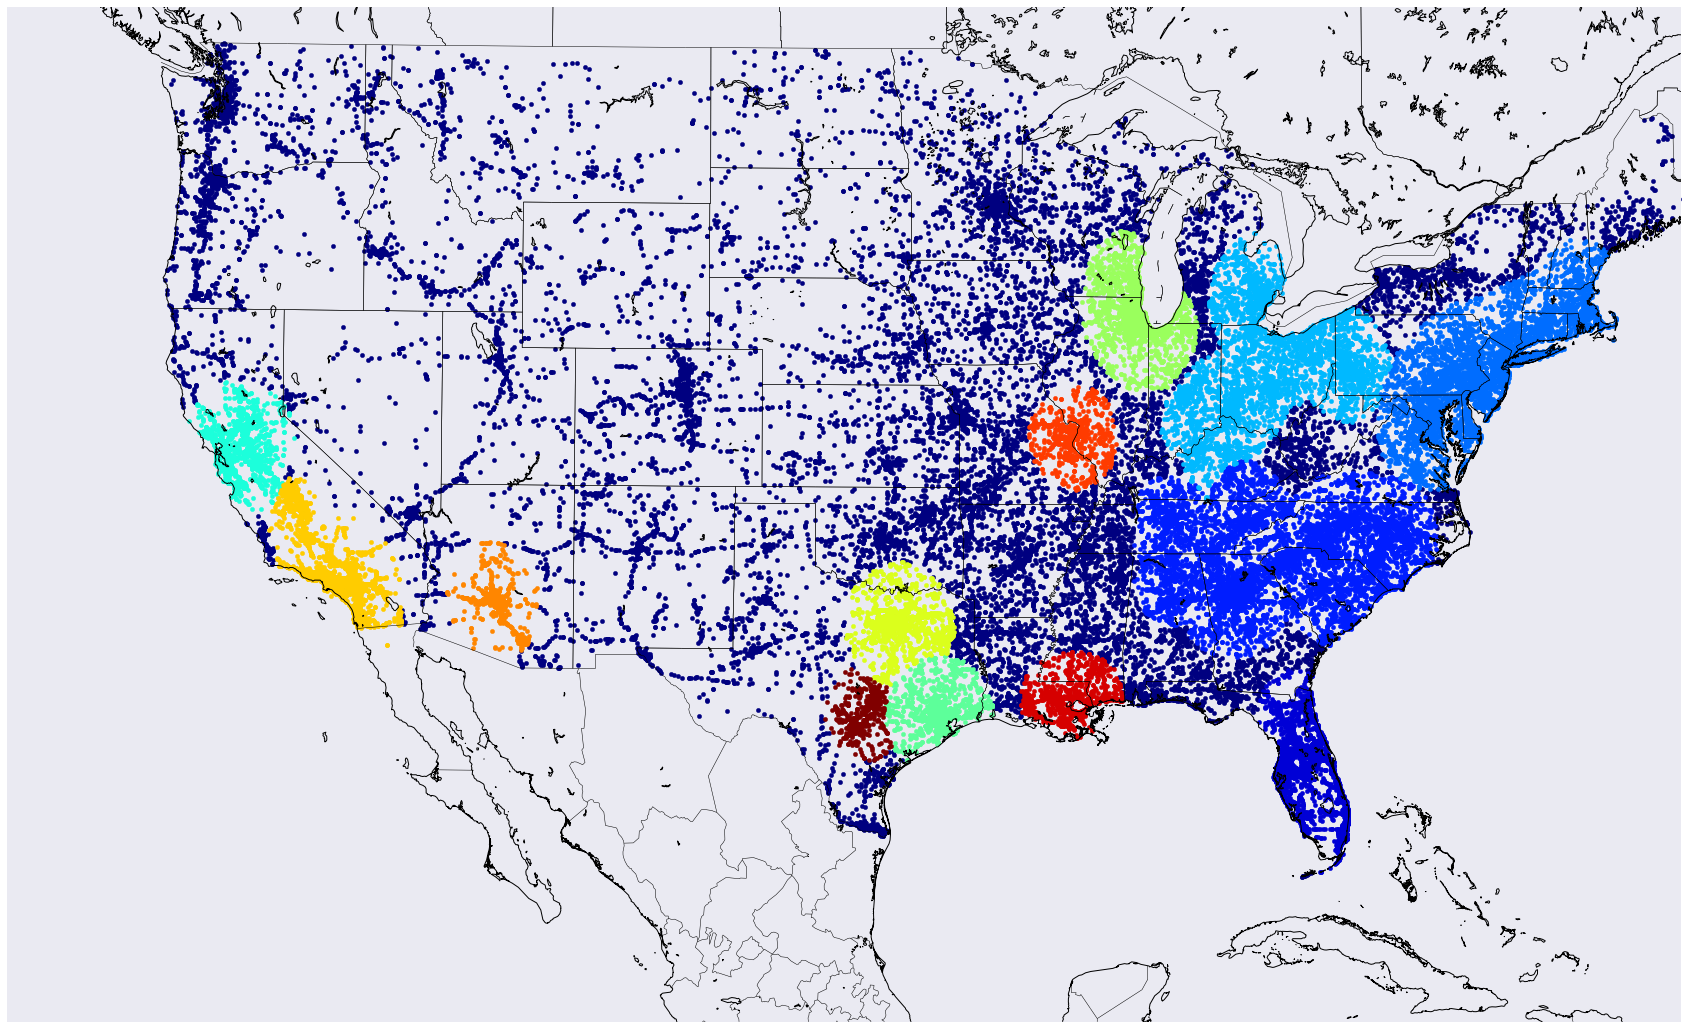

In [65]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure()
fig.set_size_inches(30,30)
m = Basemap(llcrnrlon=-130, llcrnrlat=np.min(temp2['LATITUDE']), 
            urcrnrlon=np.max(temp2['LONGITUD']), urcrnrlat=50, 
            #llcrnrlon=np.min(temp2['LONGITUD'])-20, llcrnrlat=np.min(temp2['LATITUDE'])-10, \
            #urcrnrlon=np.max(temp2['LONGITUD'])+20, urcrnrlat=np.max(temp2['LATITUDE'])+10,\
            projection='lcc', resolution='i', area_thresh=1, lat_1=-40, lat_2=42,lon_0=-85)
m.drawcoastlines()
m.drawstates()
m.drawcountries()
for c in np.unique(labels):
    lons = acc_trn_latlon_df.loc[randIndex2[labels==c],'LONGITUD'].values
    lats = acc_trn_latlon_df.loc[randIndex2[labels==c],'LATITUDE'].values
    x, y = m(lons, lats)
    colorVal = scalarMap.to_rgba(c)
    m.scatter(x, y, s=20, marker='o', color=colorVal)
plt.show()

In [ ]:
#acc_trn_df.groupby(['CF2']).count()#.plot.hist(bins = 20)
#sns.pairplot(data = acc_trn_df.drop(['STATE','COUNTY','CITY','LATITUDE','LONGITUD'], axis=1))
#temp_per_df = per_trn_df
#temp_per_df['PER_TYP'] = per_trn_df['PER_TYP'].map(lambda x: 1 if x in [1,2,9] else 0)

In [ ]:
acc_trn_df['CF1'].plot.hist

In [130]:
temp_per_df['PER_TYP'].plot.hist()

### Extract drivers (PER_TYP=1 or 9) in person dataset

In [115]:
#driver_trn_df = per_trn_df.loc[per_trn_df['PER_TYP'].isin([1, 9])]
#ndriver_trn_df = per_trn_df.loc[~per_trn_df['PER_TYP'].isin([1, 9])]

Extract accident with more than two vehicles involved

In [114]:
#acc_id_multiVeh = acc_trn_df.loc[acc_trn_df['VE_FORMS']>1]['ID'].tolist()
#driver_trn_df.loc[driver_trn_df['ID'].isin(acc_id_multiVeh)]
#temp = driver_trn_df.loc[driver_trn_df['PER_NO']>1].groupby(['PER_TYP'])
#temp.count()

,ID,STATE,VE_FORMS,VEH_NO,PER_NO,COUNTY,DAY,MONTH,HOUR,MINUTE,...,DEATH_HR,DEATH_MN,DEATH_TM,LAG_HRS,LAG_MINS,CERT_NO,WORK_INJ,HISPANIC,RACE,LOCATION
PER_TYP,,,,,,,,,,,,,,,,,,,,,
1,211,211,211,211,211,211,211,211,211,211,...,211,211,211,211,211,211,211,211,211,211
9,874,874,874,874,874,874,874,874,874,874,...,874,874,874,874,874,874,874,874,874,874


In [64]:
per_delete_list = per_trn_df.columns.intersection(acc_trn_df.columns).tolist()
per_delete_list.remove('ID')
veh_delete_list = veh_trn_df.columns.intersection(per_trn_df.columns).tolist()
veh_delete_list.remove('ID')
per_delete_list

['STATE',
 'VE_FORMS',
 'COUNTY',
 'DAY',
 'MONTH',
 'HOUR',
 'MINUTE',
 'ROAD_FNC',
 'HARM_EV',
 'MAN_COLL',
 'SCH_BUS']

In [70]:
veh_delete_list

['STATE',
 'VE_FORMS',
 'VEH_NO',
 'HARM_EV',
 'MAN_COLL',
 'MAKE',
 'MAK_MOD',
 'BODY_TYP',
 'MOD_YEAR',
 'TOW_VEH',
 'SPEC_USE',
 'EMER_USE',
 'ROLLOVER',
 'IMPACT1',
 'FIRE_EXP']

In [88]:
driver_veh_df = pd.merge(driver_trn_df, veh_trn_df.drop(veh_delete_list, axis = 1), on='ID', how='left')
driver_veh_df

,ID,STATE,VE_FORMS,VEH_NO,PER_NO,COUNTY,DAY,MONTH,HOUR,MINUTE,...,PREV_ACC,PREV_SUS,PREV_DWI,PREV_SPD,PREV_OTH,FIRST_MO,FIRST_YR,LAST_MO,LAST_YR,DEATHS
0,0,1,1,1,1,21,1,1,7,30,...,0.0,0.0,0.0,0.0,1.0,7.0,2000.0,7.0,2000.0,1
1,1,1,1,1,1,71,1,1,15,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,1,1,1,1,51,5,1,12,19,...,1.0,3.0,1.0,0.0,0.0,10.0,2000.0,5.0,2002.0,1
3,3,1,1,1,1,111,4,1,7,50,...,99.0,99.0,99.0,99.0,99.0,99.0,9999.0,99.0,9999.0,1
4,4,1,2,1,1,13,1,1,19,30,...,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,4,1,2,1,1,13,1,1,19,30,...,0.0,0.0,0.0,1.0,0.0,3.0,2000.0,3.0,2000.0,0
6,4,1,2,2,1,13,1,1,19,30,...,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,4,1,2,2,1,13,1,1,19,30,...,0.0,0.0,0.0,1.0,0.0,3.0,2000.0,3.0,2000.0,0
8,5,1,1,1,1,101,11,1,16,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,6,1,2,2,1,43,4,1,18,0,...,1.0,2.0,1.0,0.0,0.0,6.0,2002.0,12.0,2002.0,2


In [79]:
acc_per_veh_df = pd.merge(acc_trn_df, per_veh_df.drop(per_delete_list, axis=1), on='ID', how='right')

In [80]:
%whos

Variable           Type         Data/Info
-----------------------------------------
acc_columns        list         n=39
acc_per_veh_df     DataFrame                ID  STATE  VE<...>732461 rows x 75 columns]
acc_trn_df         DataFrame                ID  STATE  VE<...>287586 rows x 39 columns]
acc_trn_longlat    DataFrame             LATITUDE  LONGIT<...>[287586 rows x 2 columns]
acc_tst_longlat    DataFrame             LATITUDE  LONGIT<...>[121065 rows x 2 columns]
np                 module       <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
pd                 module       <module 'pandas' from '/h<...>ages/pandas/__init__.py'>
per_columns        list         n=48
per_delete_list    list         n=11
per_trn_df         DataFrame                ID  STATE  VE<...>732461 rows x 48 columns]
per_veh_df         DataFrame                 ID  STATE  V<...>357940 rows x 95 columns]
plt                module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sbn          

In [24]:
acc_trn_longlat = acc_trn_df.loc[:,['LATITUDE','LONGITUDE']]
acc_tst_longlat = acc_tst_df.loc[:,['LATITUDE','LONGITUDE']]
